<a href="https://colab.research.google.com/github/gi7171/Final-Project/blob/byungdu/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Final_Project

---

보건분야: 기대수명과 건강 지표 분석

데이터수집:https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated#:~:text=Life%20Expectancy%20%28WHO%29%20Fixed%20,2015%20years

라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [2]:
df = pd.read_csv('/content/Life-Expectancy-Data-Updated_1.csv')
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,4.041630,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,4.410642,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,3.617629,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,4.531415,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,2.600973,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,3.400538,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,3.328380,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,3.870638,3.44,3.3,3.3,11.1,1,0,71.8


###데이터 전처리

---



*   type 확인

*   결측치 확인
*   이상치 확인

*   데이터 스케일링 (Scaling)



In [3]:
df.shape

(2864, 21)

In [4]:
# type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
# 결측치 확인
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [8]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,3.647795,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,0.627215,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,2.170262,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,3.150987,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,3.625004,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,4.098886,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,5.050836,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [ ]:
#문자형
categorical_columns = df.select_dtypes(include='object')
categorical_columns

In [11]:
#숫자형
numerical_columns = df.select_dtypes(include='number')
numerical_columns

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,4.041630,78.53,4.9,4.8,7.8,0,1,76.5
1,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,4.410642,46.44,0.6,0.5,9.7,1,0,82.8
2,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4
3,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,3.617629,0.75,5.7,5.5,7.9,0,1,67.0
4,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,4.531415,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,2.600973,11.33,12.8,12.9,1.1,0,1,49.9
2860,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,3.400538,2.67,2.2,2.3,9.1,0,1,66.9
2861,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,3.328380,19.39,15.4,15.5,10.3,0,1,74.3
2862,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,3.870638,3.44,3.3,3.3,11.1,1,0,71.8


In [12]:
numerical_columns.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,3.647795,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,0.627215,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,2.170262,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,3.150987,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,3.625004,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,4.098886,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,5.050836,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [13]:
for col in df.columns:
  print(f"Column:{col},type:{df[col].dtype}")

Column:Country,type:object
Column:Region,type:object
Column:Year,type:int64
Column:Infant_deaths,type:float64
Column:Under_five_deaths,type:float64
Column:Adult_mortality,type:float64
Column:Alcohol_consumption,type:float64
Column:Hepatitis_B,type:int64
Column:Measles,type:int64
Column:BMI,type:float64
Column:Polio,type:int64
Column:Diphtheria,type:int64
Column:Incidents_HIV,type:float64
Column:GDP_per_capita,type:float64
Column:Population_mln,type:float64
Column:Thinness_ten_nineteen_years,type:float64
Column:Thinness_five_nine_years,type:float64
Column:Schooling,type:float64
Column:Economy_status_Developed,type:int64
Column:Economy_status_Developing,type:int64
Column:Life_expectancy,type:float64


In [10]:
numerical_columns.iloc[:,1:]

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,4.041630,78.53,4.9,4.8,7.8,0,1,76.5
1,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,4.410642,46.44,0.6,0.5,9.7,1,0,82.8
2,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4
3,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,3.617629,0.75,5.7,5.5,7.9,0,1,67.0
4,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,4.531415,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,2.600973,11.33,12.8,12.9,1.1,0,1,49.9
2860,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,3.400538,2.67,2.2,2.3,9.1,0,1,66.9
2861,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,3.328380,19.39,15.4,15.5,10.3,0,1,74.3
2862,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,3.870638,3.44,3.3,3.3,11.1,1,0,71.8


<Axes: >

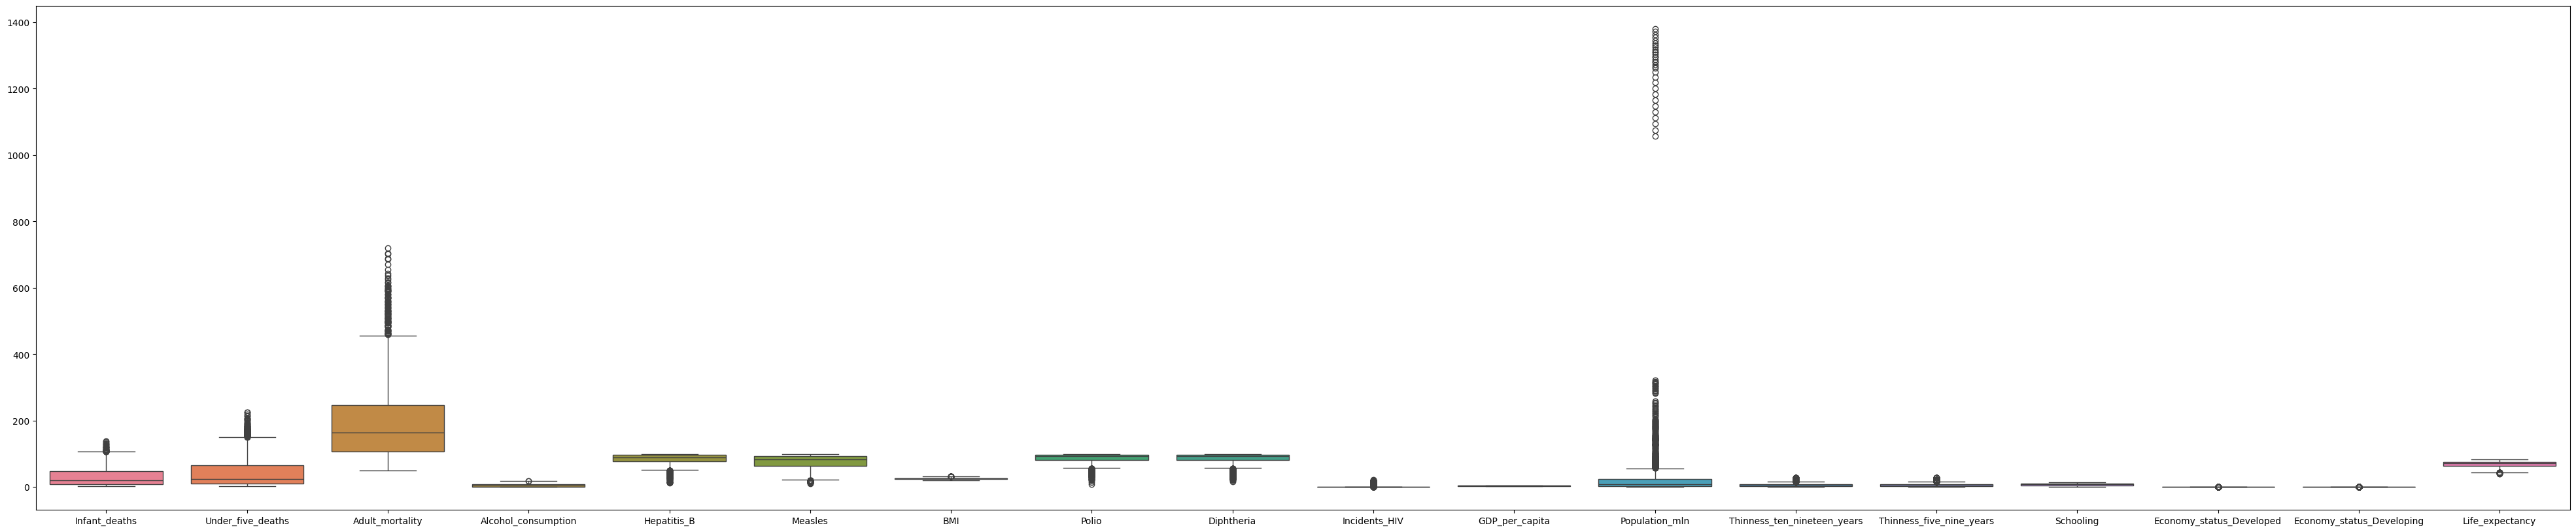

In [14]:
plt.figure(figsize=(50,10))
sns.boxplot(numerical_columns.iloc[:,1:])

<Axes: >

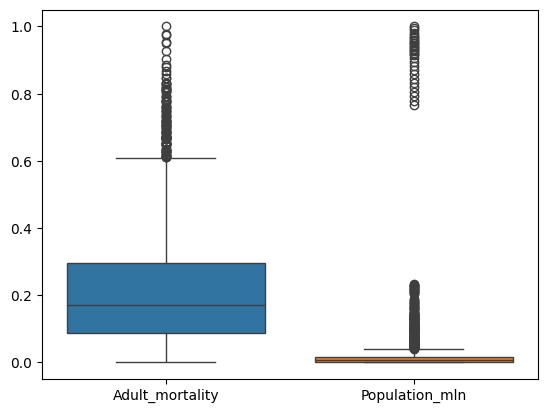

In [17]:
sns.boxplot(df[['Adult_mortality','Population_mln']])

In [13]:
df['Population_mln_log'] = np.log(df['Population_mln'])
df['Adult_mortality_log'] = np.log(df['Adult_mortality'])
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Population_mln_log,Adult_mortality_log
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,4.041630,78.53,4.9,4.8,7.8,0,1,76.5,4.363481,4.661777
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,4.410642,46.44,0.6,0.5,9.7,1,0,82.8,3.838161,4.058761
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4,7.075986,5.303685
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,3.617629,0.75,5.7,5.5,7.9,0,1,67.0,-0.287682,5.403562
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,4.531415,7.91,1.2,1.1,12.8,1,0,81.7,2.068128,4.059598


<Axes: >

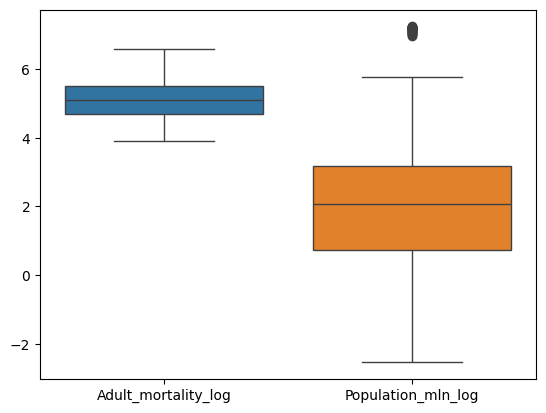

In [14]:
sns.boxplot(df[['Adult_mortality_log','Population_mln_log']])

<Axes: >

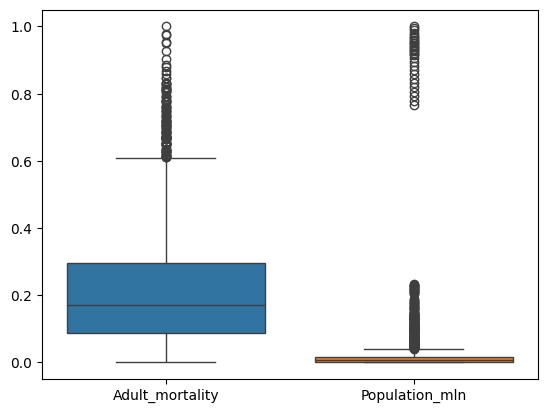

In [16]:
#데이터 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df[['Adult_mortality','Population_mln']] = scaler.fit_transform(df[['Adult_mortality','Population_mln']])
df.head()


df[['Adult_mortality','Population_mln']].describe()

sns.boxplot(df[['Adult_mortality','Population_mln']])

In [16]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Population_mln_log,Adult_mortality_log
0,Turkiye,Middle East,2015,11.1,13.0,0.084242,1.32,97,65,27.8,...,4.041630,0.056857,4.9,4.8,7.8,0,1,76.5,4.363481,4.661777
1,Spain,European Union,2015,2.7,3.3,0.012715,10.35,97,94,26.0,...,4.410642,0.033600,0.6,0.5,9.7,1,0,82.8,3.838161,4.058761
2,India,Asia,2007,51.5,67.9,0.226415,1.57,60,35,21.2,...,3.031812,0.857477,27.1,28.0,5.0,0,1,65.4,7.075986,5.303685
3,Guyana,South America,2006,32.8,40.5,0.257938,5.68,93,74,25.3,...,3.617629,0.000486,5.7,5.5,7.9,0,1,67.0,-0.287682,5.403562
4,Israel,Middle East,2012,3.4,4.3,0.012787,2.89,97,89,27.0,...,4.531415,0.005675,1.2,1.1,12.8,1,0,81.7,2.068128,4.059598


In [17]:
numerical_columns = df.select_dtypes(include='number')
numerical_columns

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Population_mln_log,Adult_mortality_log
0,2015,11.1,13.0,0.084242,1.320,97,65,27.8,97,97,...,4.041630,0.056857,4.9,4.8,7.8,0,1,76.5,4.363481,4.661777
1,2015,2.7,3.3,0.012715,10.350,97,94,26.0,97,97,...,4.410642,0.033600,0.6,0.5,9.7,1,0,82.8,3.838161,4.058761
2,2007,51.5,67.9,0.226415,1.570,60,35,21.2,67,64,...,3.031812,0.857477,27.1,28.0,5.0,0,1,65.4,7.075986,5.303685
3,2006,32.8,40.5,0.257938,5.680,93,74,25.3,92,93,...,3.617629,0.000486,5.7,5.5,7.9,0,1,67.0,-0.287682,5.403562
4,2012,3.4,4.3,0.012787,2.890,97,89,27.0,94,94,...,4.531415,0.005675,1.2,1.1,12.8,1,0,81.7,2.068128,4.059598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2000,97.0,224.9,0.361863,0.092,72,64,20.8,41,34,...,2.600973,0.008153,12.8,12.9,1.1,0,1,49.9,2.427454,5.676151
2860,2009,23.9,28.6,0.277396,6.560,97,97,25.3,96,95,...,3.400538,0.001877,2.2,2.3,9.1,0,1,66.9,0.982078,5.460577
2861,2004,17.7,28.9,0.127633,1.560,62,95,21.9,97,97,...,3.328380,0.013995,15.4,15.5,10.3,0,1,74.3,2.964757,4.904497
2862,2002,7.9,9.9,0.230796,11.000,94,95,26.1,97,95,...,3.870638,0.002435,3.3,3.3,11.1,1,0,71.8,1.235471,5.318179


In [18]:
X=numerical_columns.drop('Life_expectancy',axis=1)
Y=numerical_columns['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 결과 출력
print("훈련 데이터:", X_train.shape)
print("테스트 데이터:", X_test.shape)


훈련 데이터: (2291, 20)
테스트 데이터: (573, 20)


기대수명

In [19]:
df[['Country', 'Region']]

,Country,Region
0,Turkiye,Middle East
1,Spain,European Union
2,India,Asia
3,Guyana,South America
4,Israel,Middle East
...,...,...
2859,Niger,Africa
2860,Mongolia,Asia
2861,Sri Lanka,Asia
2862,Lithuania,European Union


In [19]:
#지역별 기대수명
df.groupby('Region').agg({'Life_expectancy':'mean'}).reset_index().sort_values('Life_expectancy',ascending=False)

,Region,Life_expectancy
5,North America,77.841667
3,European Union,77.715046
7,Rest of Europe,74.525417
4,Middle East,73.975446
8,South America,72.780729
2,Central America and Caribbean,72.437500
6,Oceania,69.517614
1,Asia,69.454861
0,Africa,57.847304


<Axes: xlabel='Region', ylabel='Life_expectancy'>

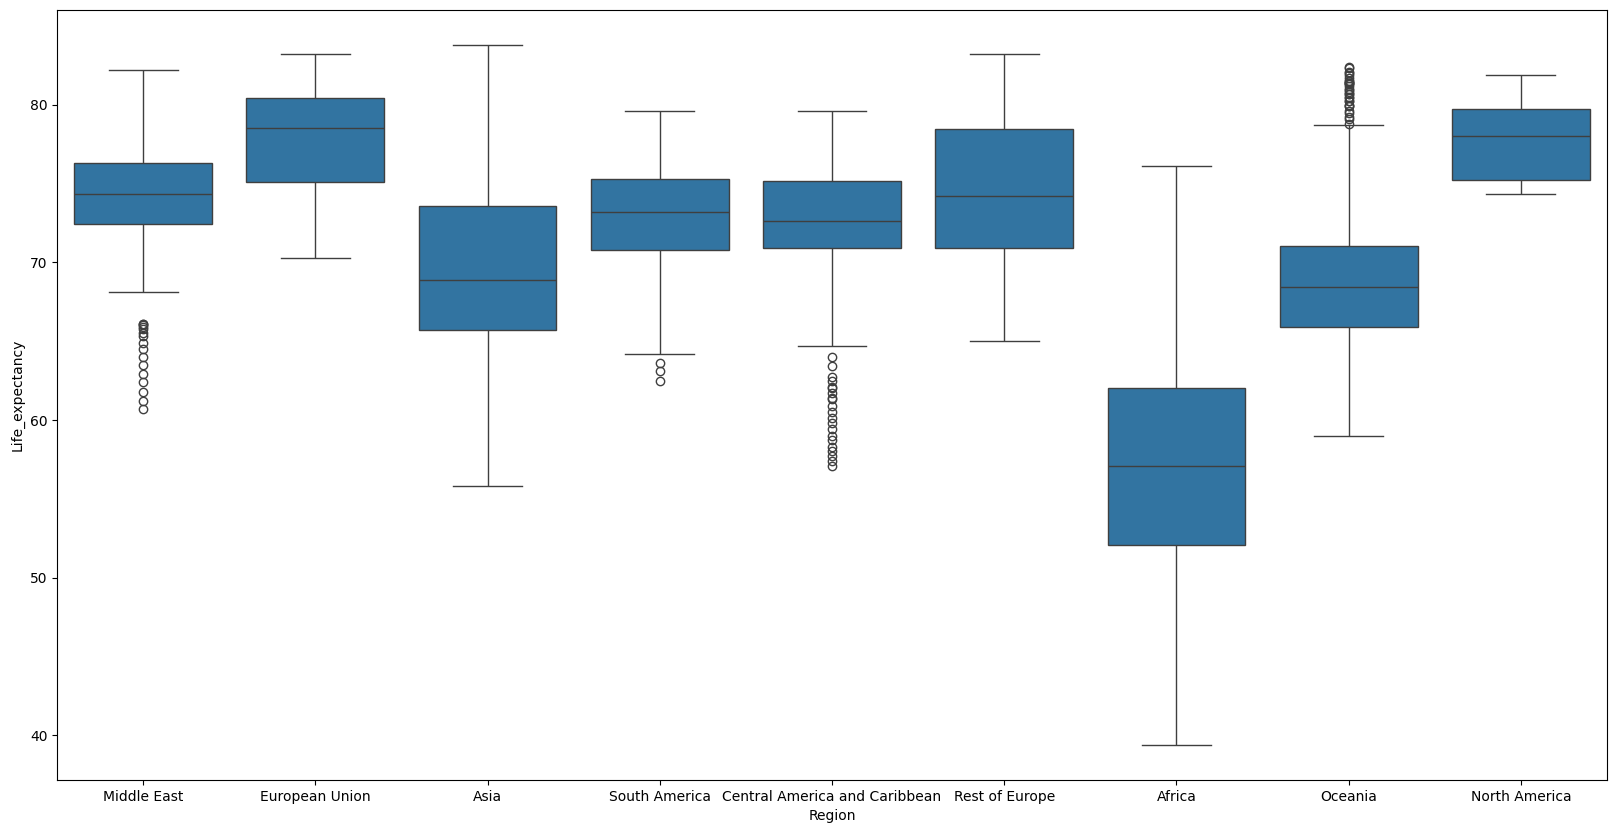

In [20]:
#시각화
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Life_expectancy')

아프리카 지역이 기대수명이 현저히 낮음

In [21]:
#년도별 기대수명
df.groupby('Year').agg({'Life_expectancy':'mean'})

,Life_expectancy
Year,
2000,66.360335
2001,66.650279
2002,66.886592
2003,67.170391
2004,67.549721
2005,67.856425
2006,68.221788
2007,68.588268
2008,68.991061


시간이 경과하면서 기대수명이 올라감

<Axes: xlabel='Year', ylabel='Life_expectancy'>

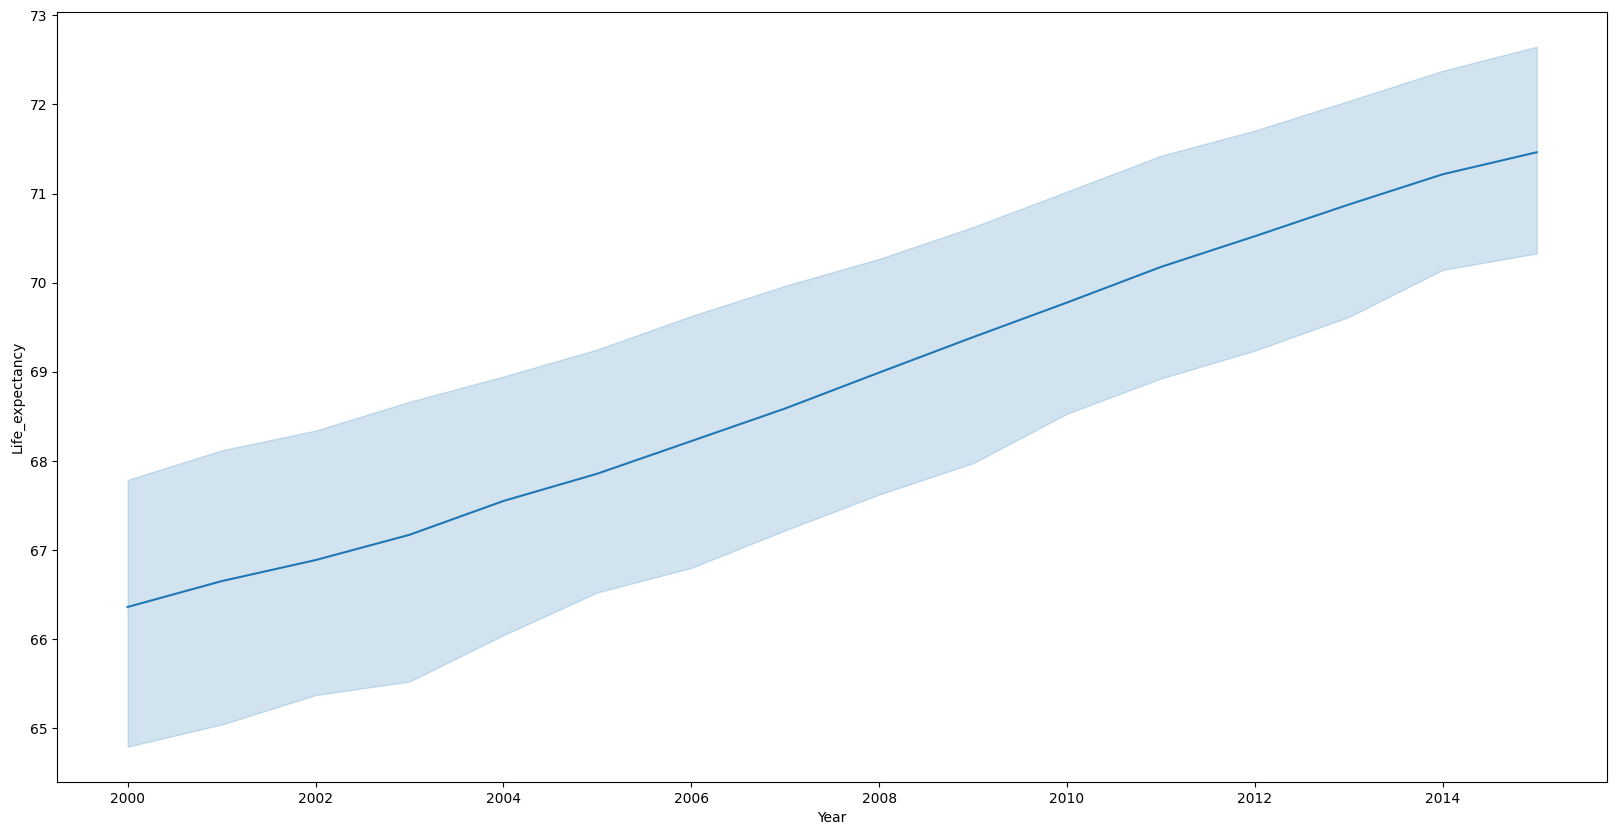

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Year',y='Life_expectancy')

In [22]:
country_year = pd.pivot_table(df,index='Region',columns='Year',values='Life_expectancy')
country_year

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,54.137255,54.358824,54.594118,54.964706,55.450980,55.956863,56.570588,57.243137,57.933333,58.627451,59.331373,59.998039,60.701961,61.309804,61.911765,62.466667
Asia,66.648148,67.048148,67.440741,67.833333,68.233333,68.596296,68.955556,69.325926,69.711111,70.125926,70.433333,70.737037,71.088889,71.403704,71.714815,71.981481
Central America and Caribbean,70.847368,71.094737,71.310526,71.542105,71.742105,71.957895,72.157895,72.357895,72.568421,72.763158,72.952632,73.168421,73.347368,73.547368,73.726316,73.915789
European Union,75.740741,76.092593,76.237037,76.366667,76.870370,76.974074,77.251852,77.422222,77.777778,78.081481,78.400000,78.874074,78.937037,79.288889,79.614815,79.511111
Middle East,72.307143,72.600000,72.857143,73.114286,73.364286,73.585714,73.828571,73.985714,74.192857,74.378571,74.535714,74.685714,74.807143,74.978571,75.114286,75.271429
North America,76.666667,76.933333,77.100000,77.266667,77.533333,77.666667,77.766667,77.933333,77.966667,78.166667,78.266667,78.333333,78.433333,78.433333,78.500000,78.500000
Oceania,67.518182,67.809091,68.109091,68.418182,68.700000,69.018182,69.263636,69.527273,69.754545,69.990909,70.200000,70.400000,70.600000,70.818182,70.981818,71.172727
Rest of Europe,72.813333,73.080000,73.140000,73.320000,73.586667,73.726667,73.966667,74.246667,74.533333,74.793333,75.153333,75.513333,75.806667,76.053333,76.293333,76.380000
South America,70.808333,71.100000,71.383333,71.650000,71.941667,72.216667,72.475000,72.733333,72.991667,73.241667,73.483333,73.700000,73.916667,74.108333,74.275000,74.466667


연도가 지나면서 기대수명이 올라간다.

###가설

---
주제:기대수명에 영향을 미치는 요인




*   .가설(체중)
  - BMI에 따라 기대수명이 달라진다.
  -과제중 ,표준체중을 비교해 본다.
  - 저체중이 생존율을 낮게 하여 기대수명이 떨어진다.

*   가설(예방)
 - 예방접종률이 사망자 수를 떨어뜨려 기대수명에 늘어난다.
 - 예방접종률 중 강력한 관계를 띄우는 예방접종이 기대수명에 좋은 영향을 미친다.













<ipython-input-20-edfa99916838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

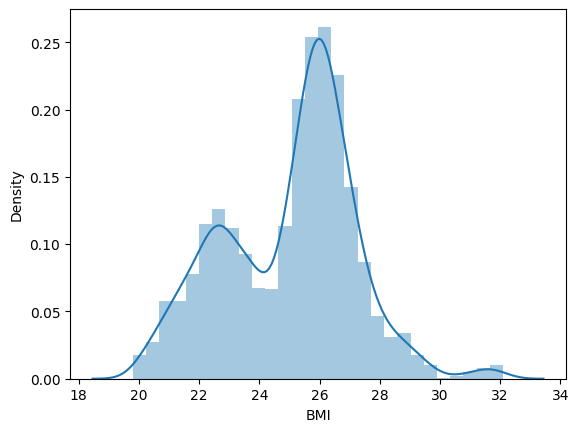

In [20]:
sns.distplot(df['BMI'])

In [40]:
print(f"MIN:{df['BMI'].min()},MAX:{df['BMI'].max()}")

MIN:19.8,MAX:32.1


In [23]:
#BMI 구간 나누기
bins=[18.5,25.0,35.0]
labels=['Normal_weight','obesity']
df['BMI_group']=pd.cut(df['BMI'],bins=bins,labels=labels)


In [24]:
df[df['BMI_group']=='Normal_weight'][['BMI_group']].value_counts()

,count
BMI_group,
Normal_weight,1174
obesity,0


In [25]:
df[df['BMI_group']=='obesity'][['BMI_group']].value_counts()

,count
BMI_group,
obesity,1690
Normal_weight,0


([<matplotlib.patches.Wedge at 0x78ef6bbf7a50>,
 [Text(-0.30716828703200155, 1.0562422276361736, 'obesity'),
  Text(0.3071683793716323, -1.0562422007826637, 'Normal_weight')],
 [Text(-0.16754633838109176, 0.5761321241651854, '59.0%'),
  Text(0.16754638874816305, -0.5761321095178166, '41.0%')])

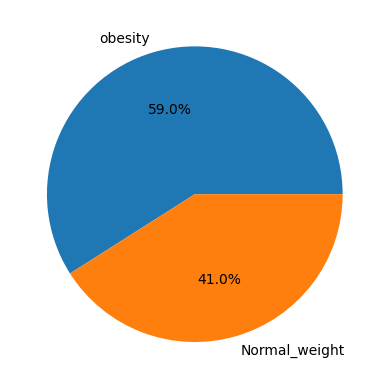

In [26]:
#시각화
plt.pie(df['BMI_group'].value_counts(),labels=df['BMI_group'].value_counts().index,autopct='%.1f%%')

BMI 수치로 비만이 더 많은 비율을 차지 한다.

In [27]:
# 가설(체중)

#BMI에 따라 기대수명이 달라진다.

df[['BMI','BMI_group','Life_expectancy']]

,BMI,BMI_group,Life_expectancy
0,27.8,obesity,76.5
1,26.0,obesity,82.8
2,21.2,Normal_weight,65.4
3,25.3,obesity,67.0
4,27.0,obesity,81.7
...,...,...,...
2859,20.8,Normal_weight,49.9
2860,25.3,obesity,66.9
2861,21.9,Normal_weight,74.3
2862,26.1,obesity,71.8


In [57]:
df.groupby('BMI_group').agg({'Life_expectancy':'mean'})

<ipython-input-57-ad6104005642>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('BMI_group').agg({'Life_expectancy':'mean'})


,Life_expectancy
BMI_group,
Normal_weight,61.587394
obesity,73.905444


In [ ]:
df[['BMI','Life_expectancy']].corr()

,BMI,Life_expectancy
BMI,1.000000,0.598423
Life_expectancy,0.598423,1.000000


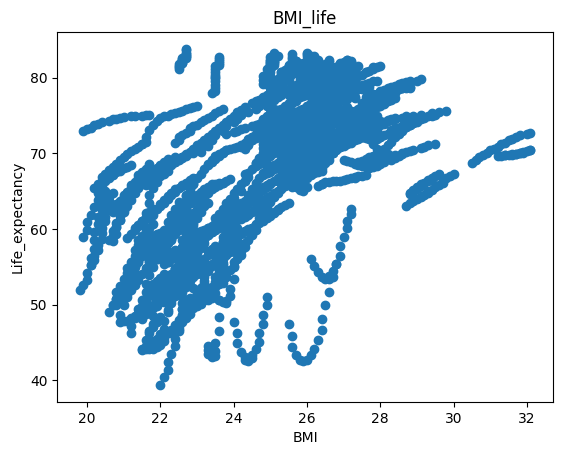

In [26]:
#시각화
x= df['BMI']
y= df['Life_expectancy']
plt.title('BMI_life')
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Life_expectancy')
plt.show()


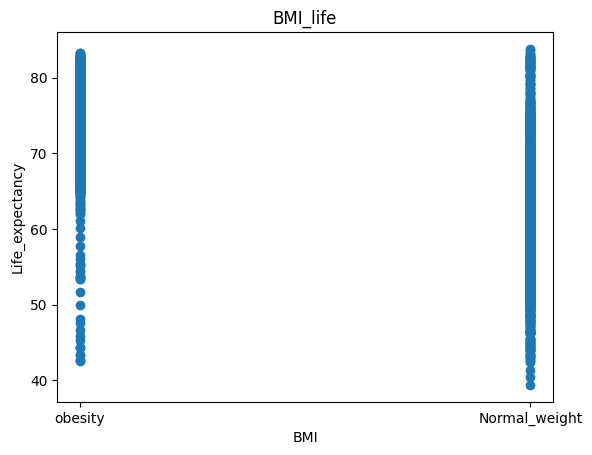

In [52]:
#시각화
x= df['BMI_group']
y= df['Life_expectancy']
plt.title('BMI_life')
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Life_expectancy')
plt.show()

<Axes: xlabel='BMI', ylabel='Life_expectancy'>

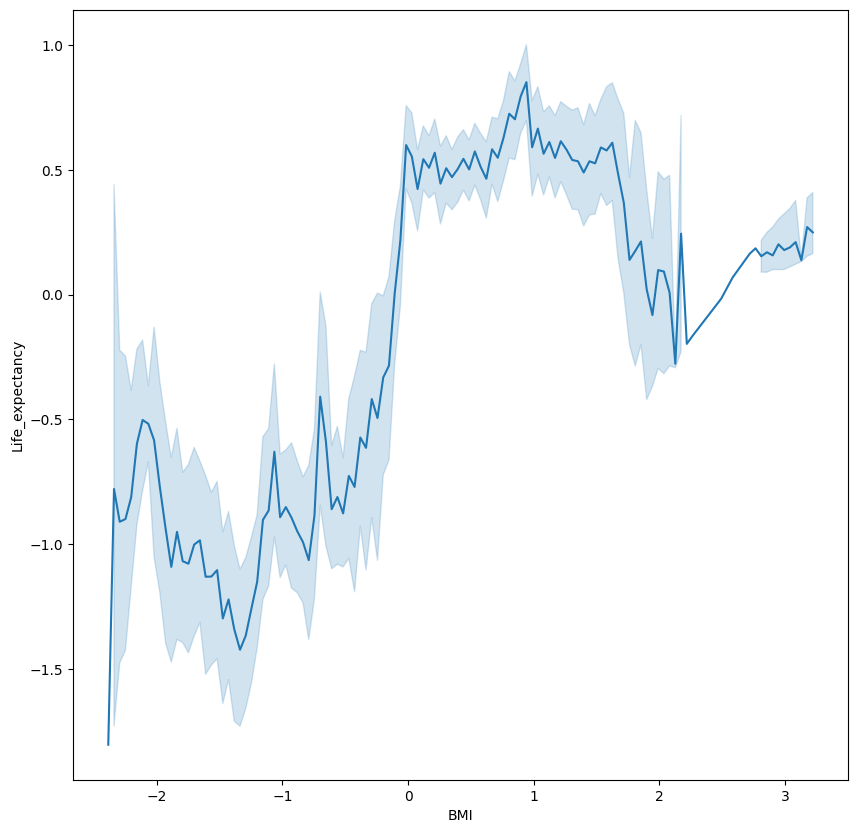

In [ ]:
#선 시각화 BMI
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='BMI',y='Life_expectancy')

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['BMI'], df['Life_expectancy'])
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 ")
else:
    print("→ 귀무가설 채택 ")


검정통계량(t): -242.82807553121464 , p-value: 0.0
→ 귀무가설 기각 


LinearRegression()으로 추정한 모수
회귀계수는 2.6
절편은 4.6

Mean Squared Error is 5.7e+01


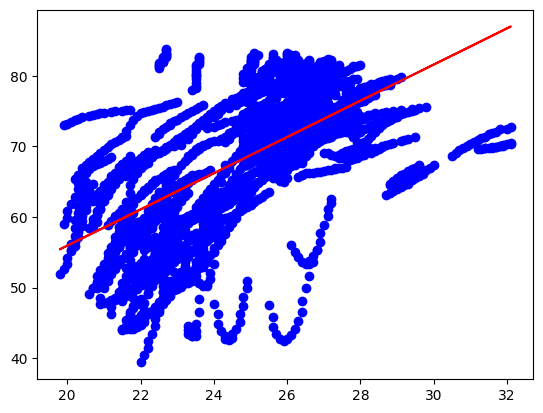

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['BMI']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue', label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

<ipython-input-17-1fa081967a90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Thinness_ten_nineteen_years'])


<Axes: xlabel='Thinness_ten_nineteen_years', ylabel='Density'>

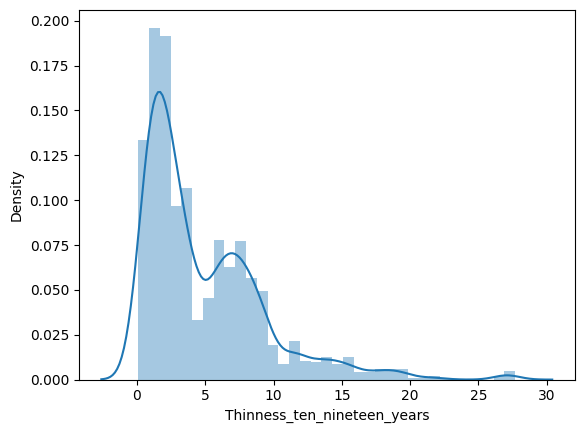

In [ ]:
sns.distplot(df['Thinness_ten_nineteen_years'])

In [ ]:
# 청소년 저체중 기대수명 조사
df[['Thinness_ten_nineteen_years','Life_expectancy']]

,Thinness_ten_nineteen_years,Life_expectancy
0,4.9,76.5
1,0.6,82.8
2,27.1,65.4
3,5.7,67.0
4,1.2,81.7
...,...,...
2859,12.8,49.9
2860,2.2,66.9
2861,15.4,74.3
2862,3.3,71.8


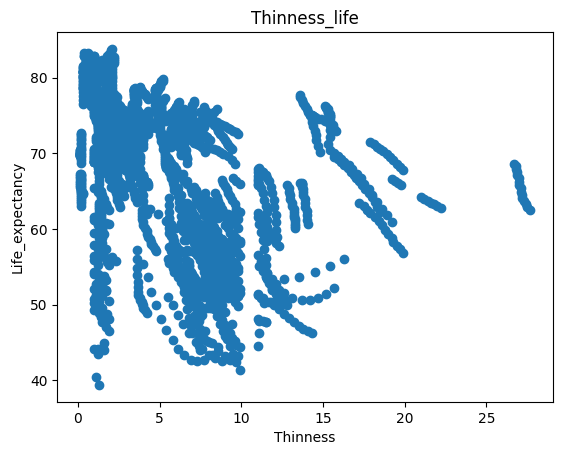

In [ ]:
#시각화
x= df['Thinness_ten_nineteen_years']
y= df['Life_expectancy']
plt.title('Thinness_life')
plt.scatter(x,y)
plt.xlabel('Thinness')
plt.ylabel('Life_expectancy')
plt.show()

<Axes: xlabel='Thinness_ten_nineteen_years', ylabel='Life_expectancy'>

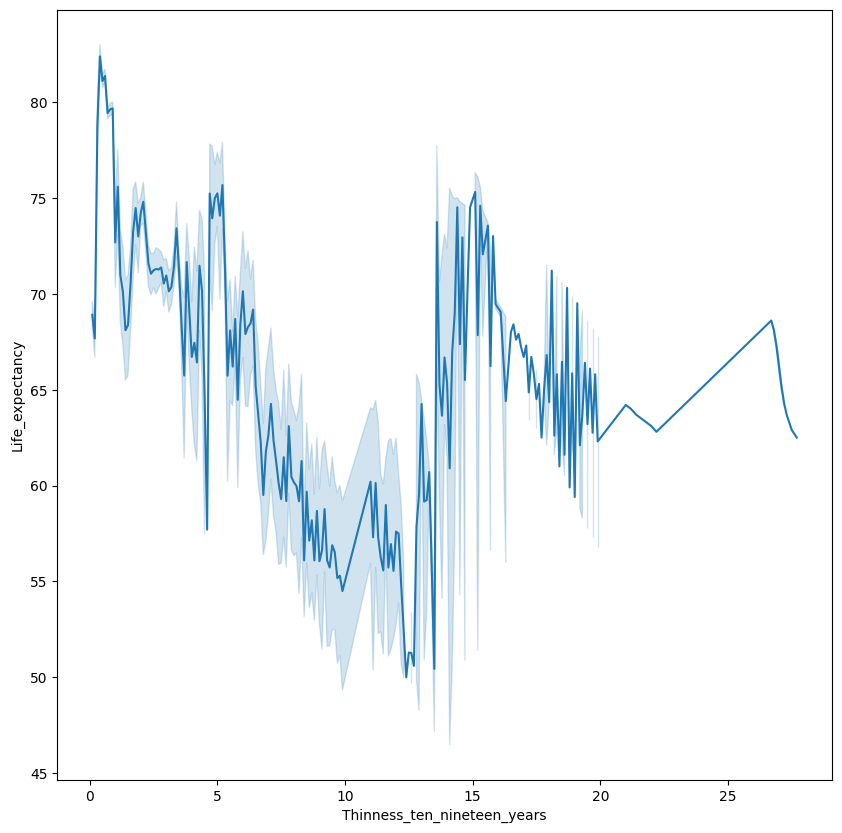

In [ ]:
#선 시각화 청소년 저체중
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='Thinness_ten_nineteen_years',y='Life_expectancy')

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Thinness_ten_nineteen_years'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): 4.2240143031140596e-16 , p-value: 0.9999999999999997
→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)


LinearRegression()으로 추정한 모수
회귀계수는 -0.99
절편은 7.4e+01

Mean Squared Error is 6.9e+01


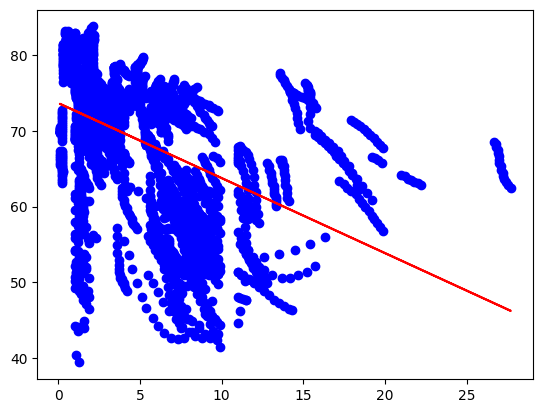

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['Thinness_ten_nineteen_years']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue', label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

저체중 비율이 많이질수록 기대수명이 줄어든다.

In [ ]:
#5~9세 저체중율
df[['Thinness_five_nine_years','Life_expectancy']].head()

,Thinness_five_nine_years,Life_expectancy
0,4.8,76.5
1,0.5,82.8
2,28.0,65.4
3,5.5,67.0
4,1.1,81.7


<ipython-input-50-d934075d1387>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Thinness_five_nine_years'])


<Axes: xlabel='Thinness_five_nine_years', ylabel='Density'>

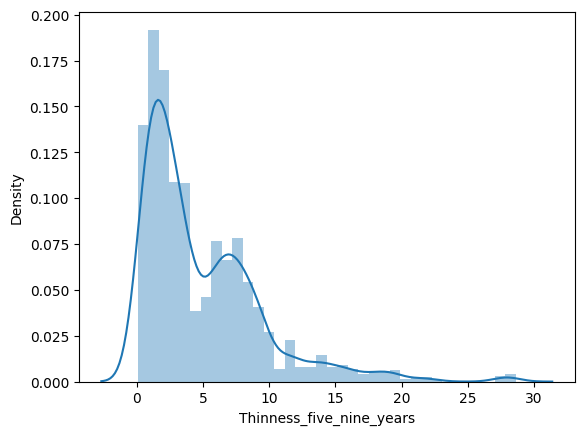

In [ ]:
sns.distplot(df['Thinness_five_nine_years'])

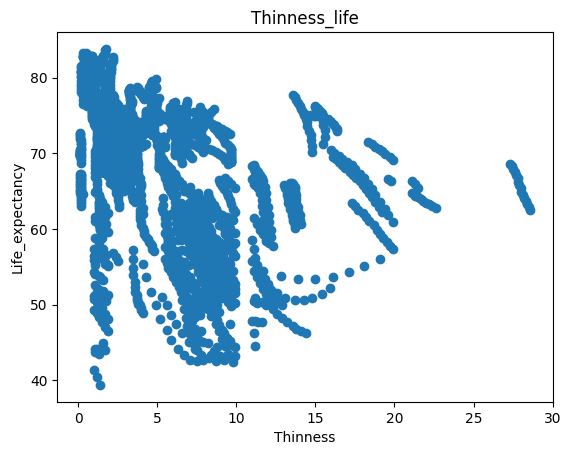

In [ ]:
#시각화
x= df['Thinness_five_nine_years']
y= df['Life_expectancy']
plt.title('Thinness_life')
plt.scatter(x,y)
plt.xlabel('Thinness')
plt.ylabel('Life_expectancy')
plt.show()

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Thinness_five_nine_years'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -327.9213845230187 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


LinearRegression()으로 추정한 모수
회귀계수는 -0.99
절편은 7.4e+01

Mean Squared Error is 6.9e+01


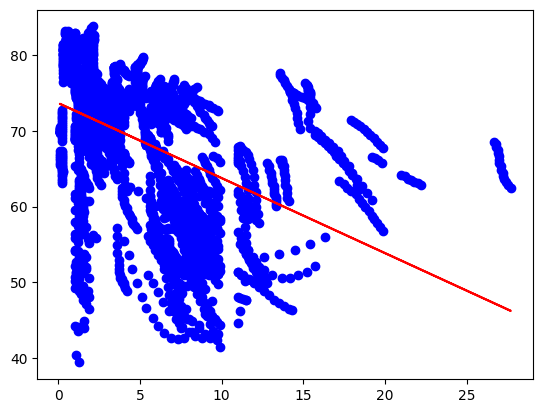

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['Thinness_ten_nineteen_years']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue', label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

가설(예방)

---


예방접종률이 사망자 수를 떨어뜨려 기대수명에 늘어난다.

In [ ]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
0,97,97,97,76.5
1,97,97,97,82.8
2,67,64,60,65.4
3,92,93,93,67.0
4,94,94,97,81.7
...,...,...,...,...
2859,41,34,72,49.9
2860,96,95,97,66.9
2861,97,97,62,74.3
2862,97,95,94,71.8


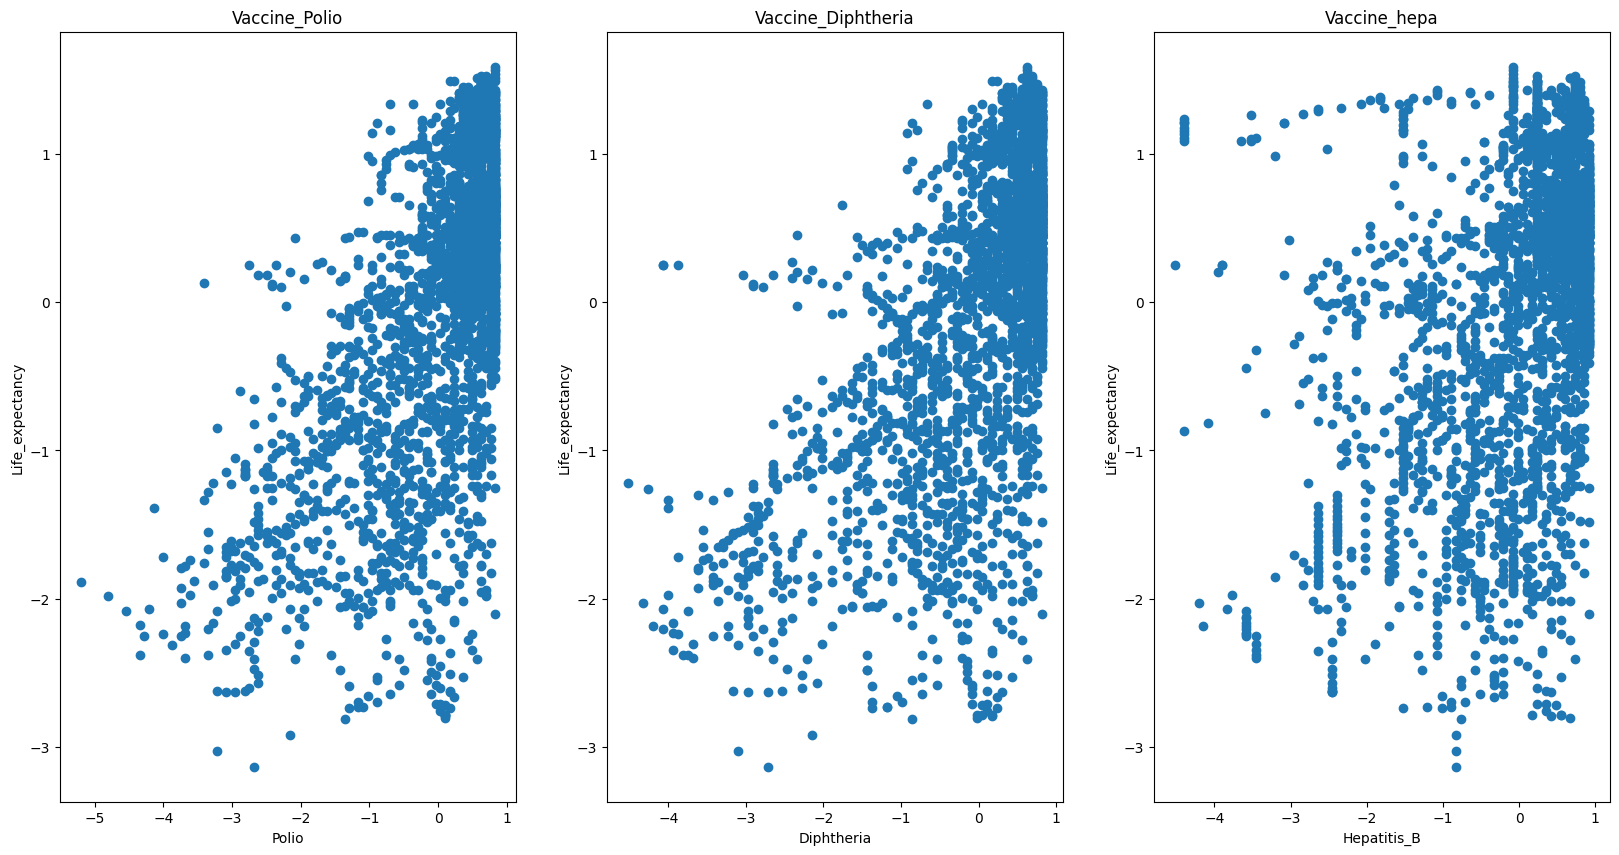

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Vaccine_Polio')
plt.scatter(df['Polio'],df['Life_expectancy'])
plt.xlabel('Polio')
plt.ylabel('Life_expectancy')

plt.subplot(1,3,2)
plt.title('Vaccine_Diphtheria')
plt.scatter(df['Diphtheria'],df['Life_expectancy'])
plt.xlabel('Diphtheria')
plt.ylabel('Life_expectancy')

plt.subplot(1,3,3)
plt.title('Vaccine_hepa')
plt.scatter(df['Hepatitis_B'],df['Life_expectancy'])
plt.xlabel('Hepatitis_B')
plt.ylabel('Life_expectancy')

plt.show()

In [ ]:
vaccine = df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

vaccine.corr()['Life_expectancy']

,Life_expectancy
Polio,0.641217
Diphtheria,0.627541
Hepatitis_B,0.417804
Life_expectancy,1.000000


예방접종 Polio에 상관관계를 보여줌

<Axes: >

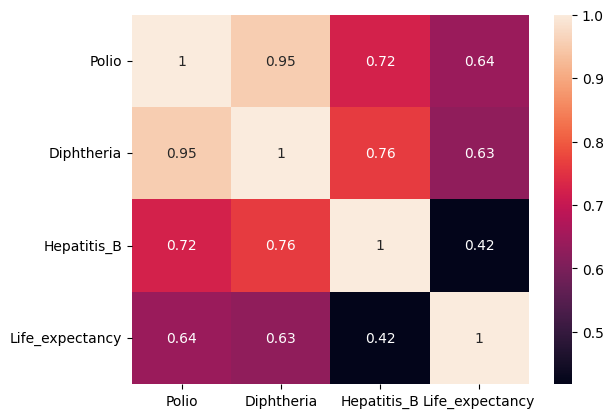

In [ ]:
#시각화
sns.heatmap(vaccine.corr(),annot=True)

In [ ]:
from scipy.stats import f_oneway

# 일원분산분석
f_stat, p_value = f_oneway(df['Polio'],df['Diphtheria'],df['Hepatitis_B'],df['Life_expectancy'])


print("검정통계량(t):", f_stat, ", p-value:", p_value)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")



검정통계량(t): 1.6511467079428485e-31 , p-value: 1.0
→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)


In [ ]:
#다중회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= df[['Polio','Diphtheria','Hepatitis_B']]
Y= df['Life_expectancy']

#다중회귀모형 적합
model = LinearRegression()
model.fit(X,Y)

# 회귀계수와 절편 출력
print('회귀계수는',end=' ')
for feature, coef in zip(X.columns,model.coef_):
    print(f'{feature}:{coef:.2}',end=' ')
print(f'\n절편은 {model.intercept_:.2}')

#모형 성능 평가
y_pred = model.predict(X)
mse = mean_squared_error(Y,y_pred)
print(f'\nMean Squared Error is {mse:.2}\n')



회귀계수는 Polio:0.29 Diphtheria:0.18 Hepatitis_B:-0.083 
절편은 3.6e+01

Mean Squared Error is 5.1e+01



연도별 예방접종률

In [67]:
df.groupby('Year').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean','Life_expectancy':'mean'})

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
Year,,,,
2000,81.983240,81.597765,78.832402,66.360335
2001,82.530726,82.178771,79.625698,66.650279
2002,83.603352,82.659218,79.960894,66.886592
2003,84.184358,83.575419,81.005587,67.170391
2004,84.569832,84.441341,82.167598,67.549721
2005,86.100559,85.960894,83.273743,67.856425
2006,86.435754,86.256983,84.446927,68.221788
2007,87.296089,87.307263,85.150838,68.588268
2008,87.955307,87.474860,85.446927,68.991061


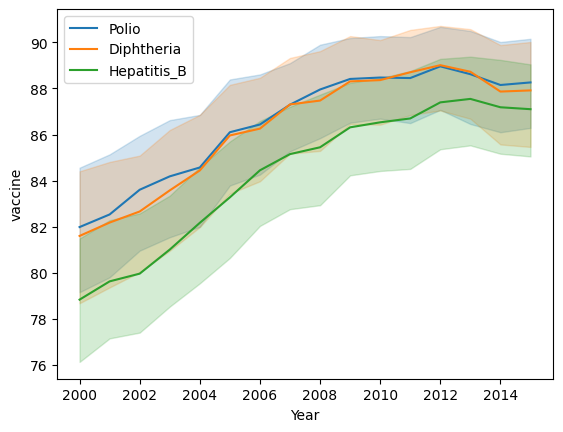

In [66]:
sns.lineplot(data=df,x='Year',y='Polio',label='Polio')
sns.lineplot(data=df,x='Year',y='Diphtheria',label='Diphtheria')
sns.lineplot(data=df,x='Year',y='Hepatitis_B',label='Hepatitis_B')
plt.ylabel('vaccine')
plt.show()

국가별 예방접종률

In [73]:
df.groupby('Region').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean','Life_expectancy':'mean'}).reset_index().sort_values(by='Life_expectancy',ascending=False)

,Region,Polio,Diphtheria,Hepatitis_B,Life_expectancy
5,North America,92.854167,93.729167,73.291667,77.841667
3,European Union,95.530093,95.678241,89.208333,77.715046
7,Rest of Europe,92.954167,92.341667,87.366667,74.525417
4,Middle East,90.022321,89.616071,88.415179,73.975446
8,South America,89.427083,89.625000,88.036458,72.780729
2,Central America and Caribbean,91.049342,90.878289,89.980263,72.437500
6,Oceania,81.829545,80.556818,80.664773,69.517614
1,Asia,88.194444,87.942130,84.402778,69.454861
0,Africa,76.205882,75.992647,78.025735,57.847304


<Axes: xlabel='Region', ylabel='Polio'>

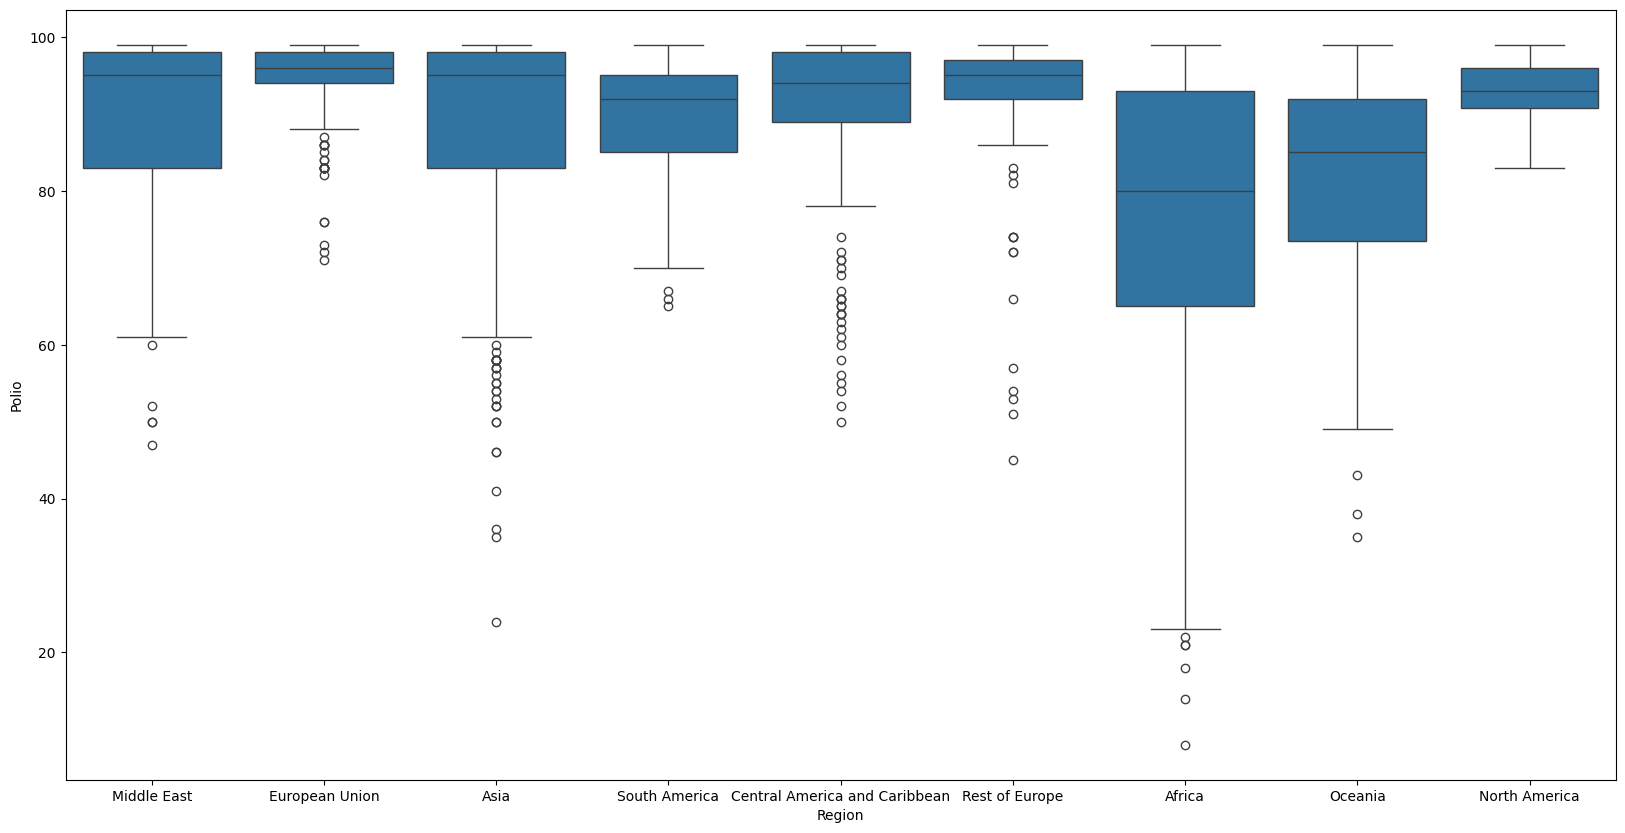

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Polio')

<Axes: xlabel='Region', ylabel='Diphtheria'>

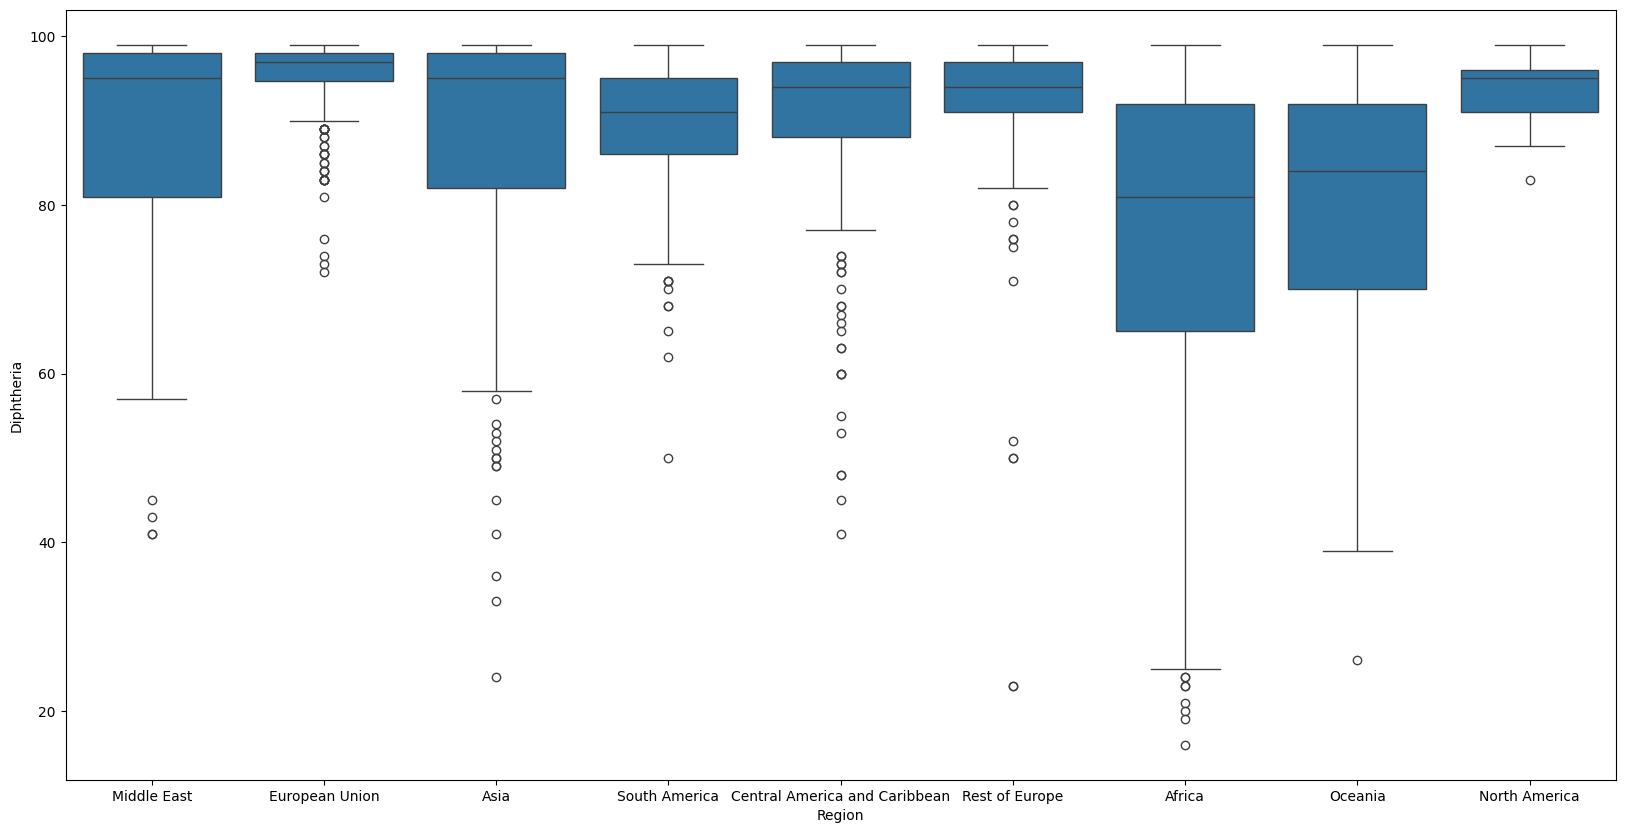

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Diphtheria')

<Axes: xlabel='Region', ylabel='Hepatitis_B'>

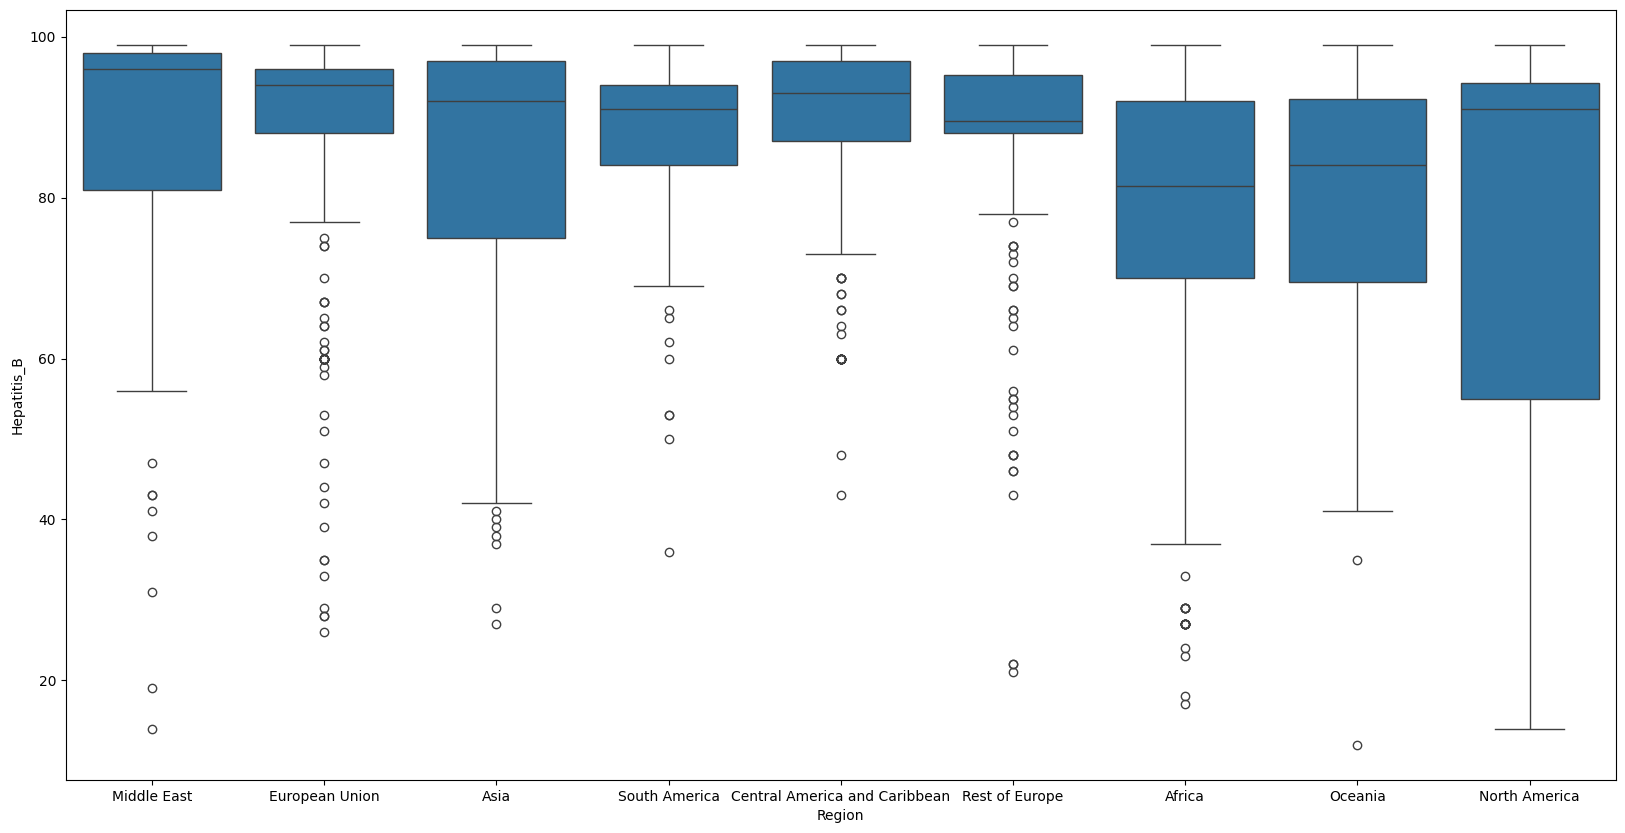

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Hepatitis_B')

In [31]:
#지역 나라별 기대수명

df.groupby(['Region','Year'])['Life_expectancy'].mean()

Region         Year
Africa         2000    54.137255
               2001    54.358824
               2002    54.594118
               2003    54.964706
               2004    55.450980
                         ...    
South America  2011    73.700000
               2012    73.916667
               2013    74.108333
               2014    74.275000
               2015    74.466667
Name: Life_expectancy, Length: 144, dtype: float64

###EDA

예방접종

*   나라별
*   연도별
* 개발도상국, 선진국


In [28]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
0,97,97,97,76.5
1,97,97,97,82.8
2,67,64,60,65.4
3,92,93,93,67.0
4,94,94,97,81.7
...,...,...,...,...
2859,41,34,72,49.9
2860,96,95,97,66.9
2861,97,97,62,74.3
2862,97,95,94,71.8


In [30]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']].corr()['Life_expectancy']

,Life_expectancy
Polio,0.641217
Diphtheria,0.627541
Hepatitis_B,0.417804
Life_expectancy,1.000000


<Axes: >

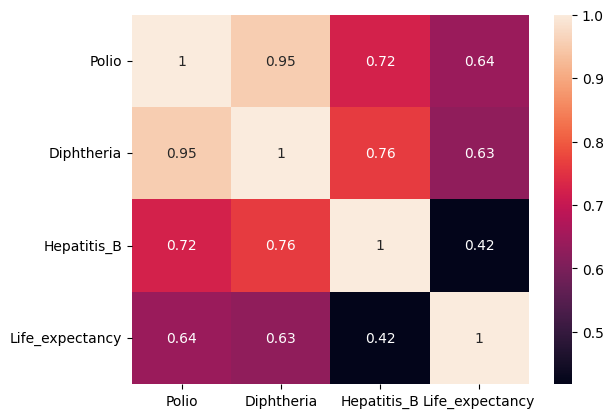

In [32]:
sns.heatmap(df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']].corr(),annot=True)

In [31]:
df.groupby('Region').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Region,,,
Africa,76.205882,75.992647,78.025735
Asia,88.194444,87.942130,84.402778
Central America and Caribbean,91.049342,90.878289,89.980263
European Union,95.530093,95.678241,89.208333
Middle East,90.022321,89.616071,88.415179
North America,92.854167,93.729167,73.291667
Oceania,81.829545,80.556818,80.664773
Rest of Europe,92.954167,92.341667,87.366667
South America,89.427083,89.625000,88.036458


<Axes: title={'center': 'Polio'}, xlabel='Region', ylabel='Polio'>

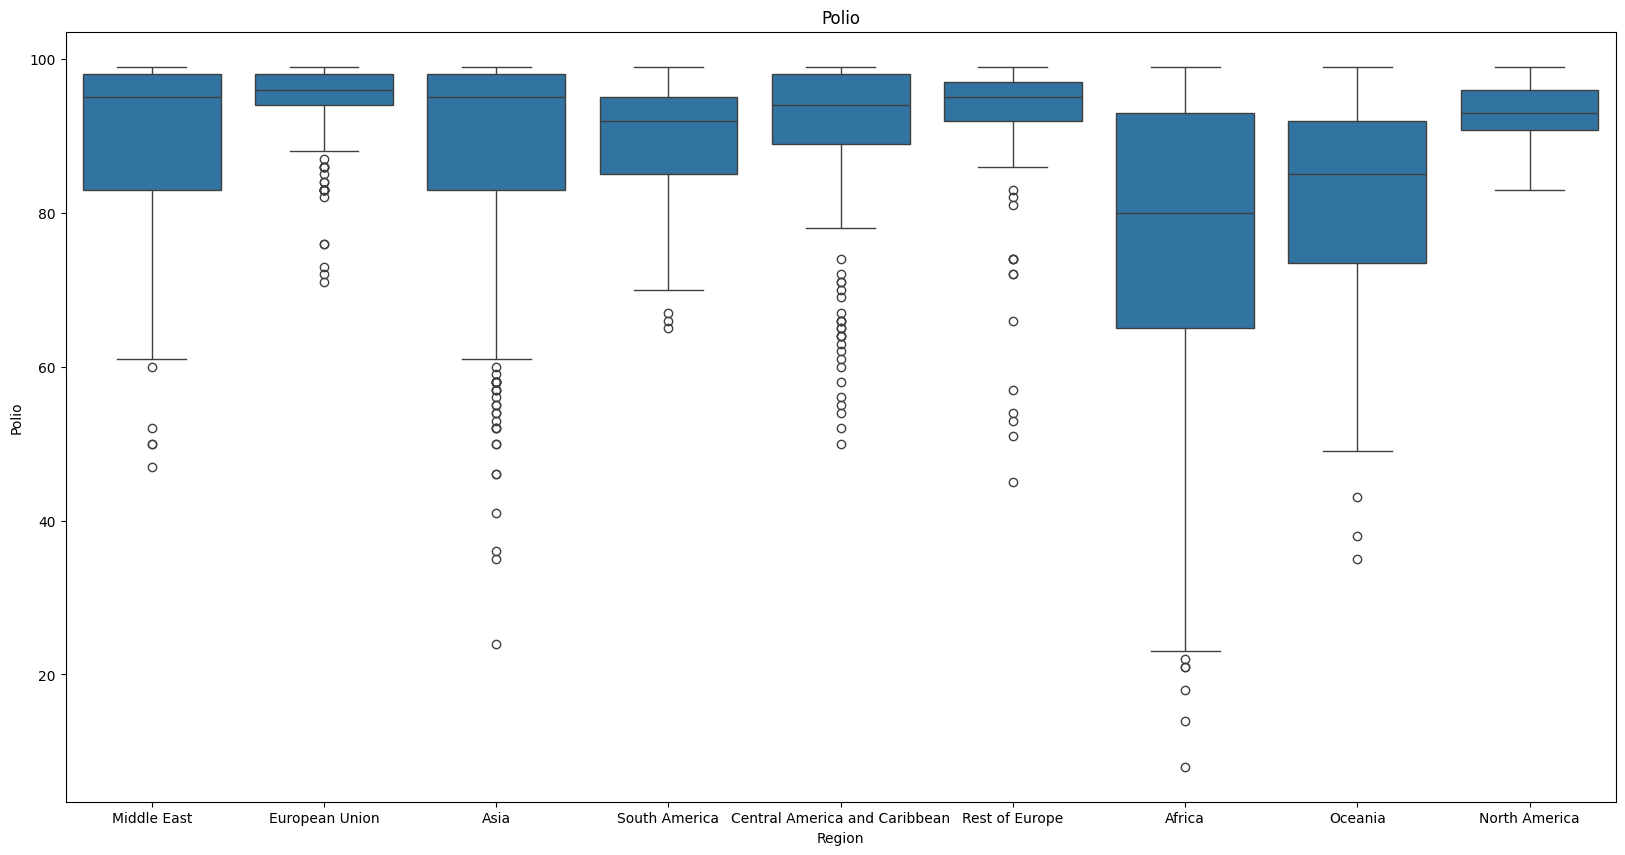

In [23]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Polio")
sns.boxplot(data=df[['Country','Region','Polio']],x='Region',y='Polio')

<Axes: title={'center': 'Diphtheria'}, xlabel='Region', ylabel='Diphtheria'>

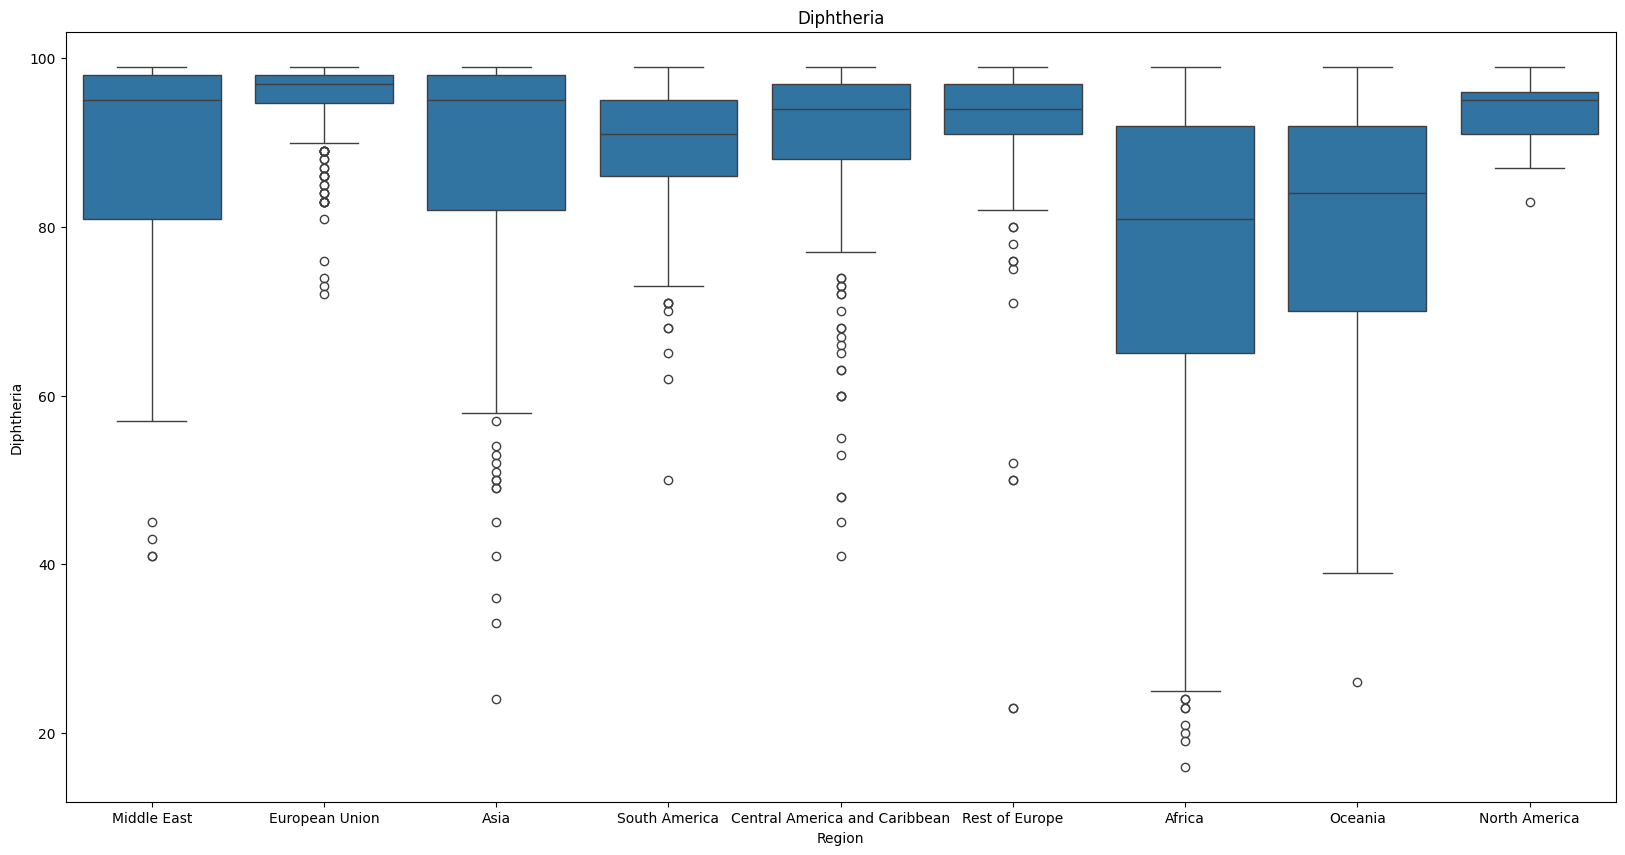

In [22]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Diphtheria")
sns.boxplot(data=df[['Country','Region','Diphtheria']],x='Region',y='Diphtheria')

<Axes: title={'center': 'Hepatitis_B'}, xlabel='Region', ylabel='Hepatitis_B'>

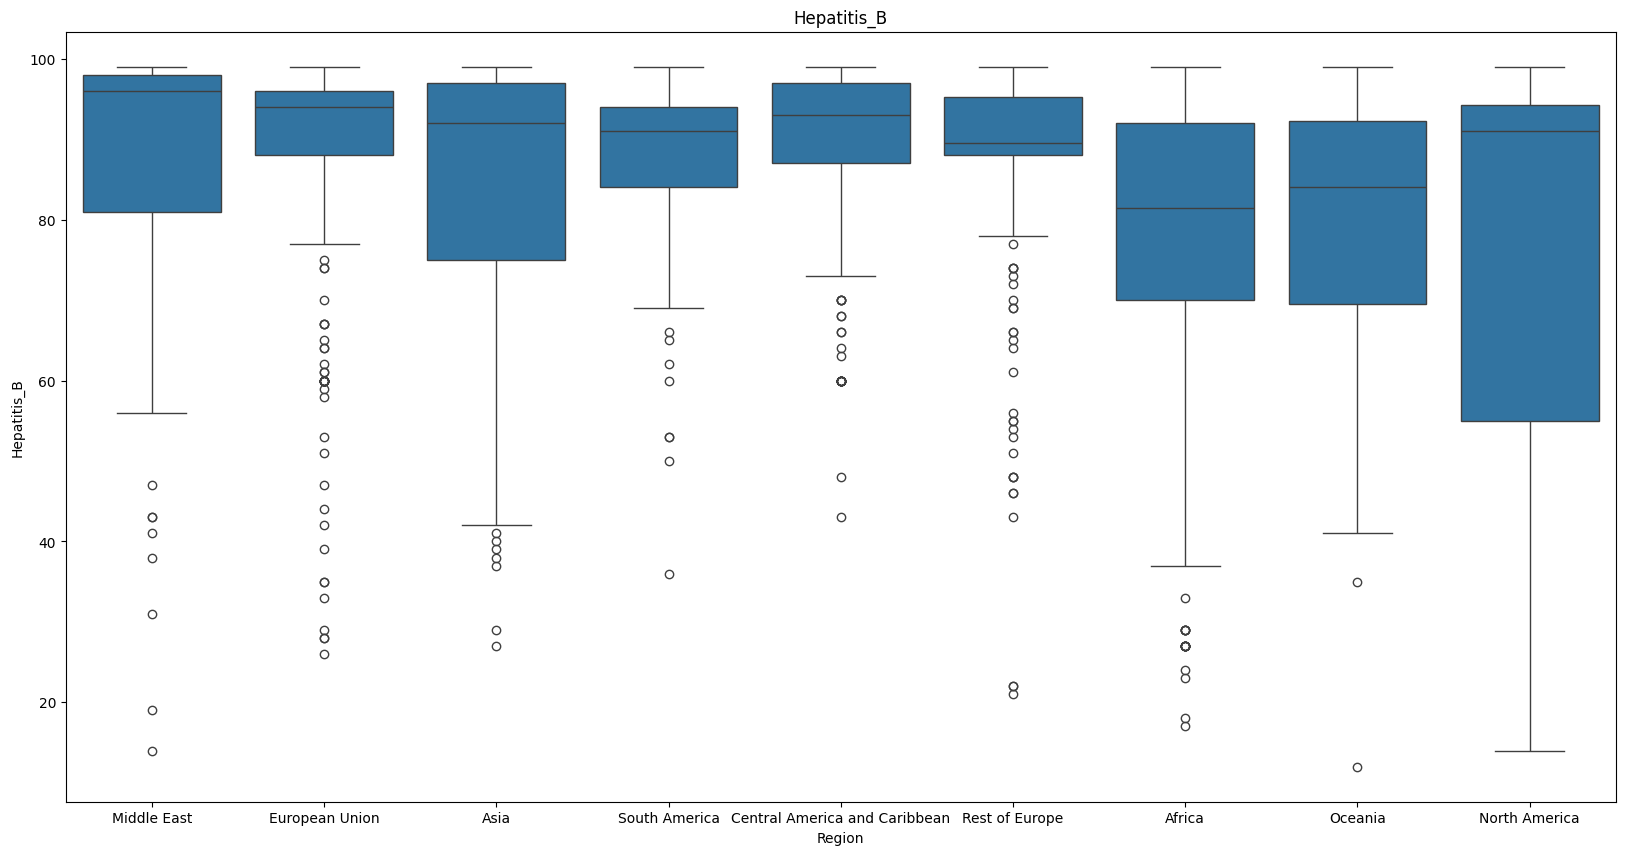

In [32]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Hepatitis_B")
sns.boxplot(data=df[['Country','Region','Hepatitis_B']],x='Region',y='Hepatitis_B')

예방 접종률이 Africa 지역이 현저히 낮음

---
Africa 지역의 나라 예방접종을 알아볼려고 함


In [16]:
df[df['Region']=='Africa'][['Country','Region']]

,Country,Region
17,Comoros,Africa
19,Gabon,Africa
20,Ghana,Africa
22,"Congo, Rep.",Africa
23,Madagascar,Africa
...,...,...
2842,Seychelles,Africa
2844,Burkina Faso,Africa
2851,Mozambique,Africa
2852,Nigeria,Africa


In [18]:
df[df['Region']=='Africa'].groupby('Country').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Country,,,
Algeria,91.7500,91.8750,88.3125
Angola,35.7500,55.5625,68.8125
Benin,76.1250,76.3750,75.9375
Botswana,96.1875,95.8125,92.3750
Burkina Faso,84.1875,82.3750,88.0000
Burundi,86.6250,90.2500,91.7500
Cabo Verde,94.5000,94.1875,86.1250
Cameroon,76.5000,78.4375,82.6250
Central African Republic,44.0000,44.6875,43.9375


연도별 예방접종률 조사

In [24]:
df.groupby('Year').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Year,,,
2000,81.983240,81.597765,78.832402
2001,82.530726,82.178771,79.625698
2002,83.603352,82.659218,79.960894
2003,84.184358,83.575419,81.005587
2004,84.569832,84.441341,82.167598
2005,86.100559,85.960894,83.273743
2006,86.435754,86.256983,84.446927
2007,87.296089,87.307263,85.150838
2008,87.955307,87.474860,85.446927


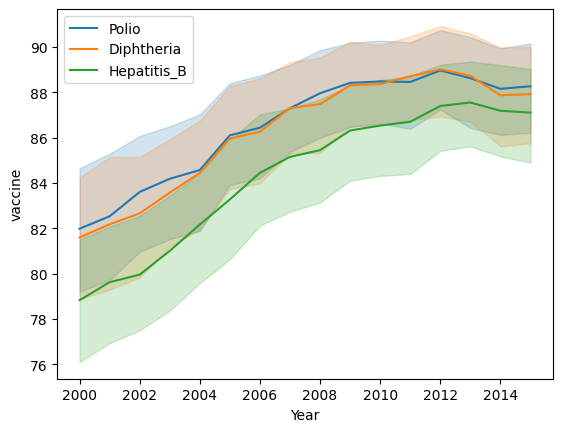

In [30]:
sns.lineplot(data=df,x='Year',y='Polio',label='Polio')
sns.lineplot(data=df,x='Year',y='Diphtheria',label='Diphtheria')
sns.lineplot(data=df,x='Year',y='Hepatitis_B',label='Hepatitis_B')
plt.ylabel('vaccine')
plt.show()

예방접종: Polio > Diphtheria > Hepatitis_B 예방접종을 하는 것 같음

선진국 예방접종

([<matplotlib.patches.Wedge at 0x7a911ddf5b10>,
 [Text(-0.876105143379666, 0.665161467422531, '0'),
  Text(0.8761053601167362, -0.6651611819512051, '1')],
 [Text(-0.4778755327525451, 0.36281534586683506, '79.3%'),
  Text(0.4778756509727652, -0.36281519015520275, '20.7%')])

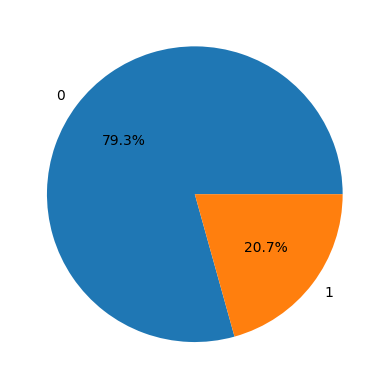

In [34]:
#시각화
plt.pie(df['Economy_status_Developed'].value_counts(),labels=df['Economy_status_Developed'].value_counts().index,autopct='%.1f%%')

In [46]:
#Economy_status_Developed 선진국 나라
df[['Country','Region','Economy_status_Developed','Year']].sort_values(by='Year')

,Country,Region,Economy_status_Developed,Year
744,Eritrea,Africa,0,2000
7,Hungary,European Union,1,2000
1789,North Macedonia,Rest of Europe,0,2000
2402,Belgium,European Union,1,2000
2823,Czechia,European Union,1,2000
...,...,...,...,...
1,Spain,European Union,1,2015
6,Russian Federation,Rest of Europe,0,2015
2848,Bahrain,Middle East,0,2015
27,Cameroon,Africa,0,2015


In [38]:
df.groupby('Economy_status_Developed').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Economy_status_Developed,,,
0,84.319542,83.977113,83.365757
1,94.866554,95.077703,87.849662


선진국은 예방접종이 잘 되어 있는 것 같음

<Axes: title={'center': 'Polio'}, xlabel='Economy_status_Developed', ylabel='Polio'>

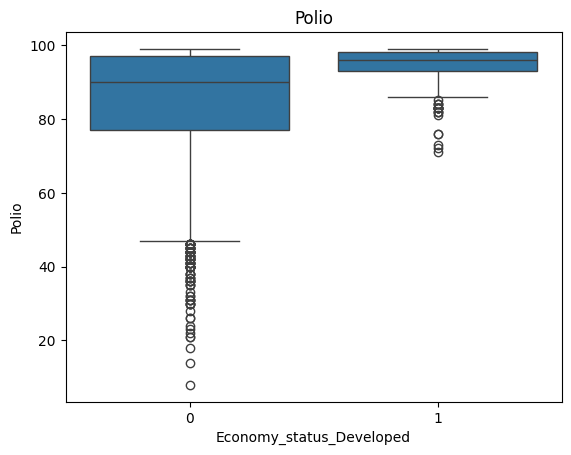

In [47]:
plt.title("Polio")
sns.boxplot(data=df,x='Economy_status_Developed',y='Polio')

<Axes: title={'center': 'Diphtheria'}, xlabel='Economy_status_Developed', ylabel='Diphtheria'>

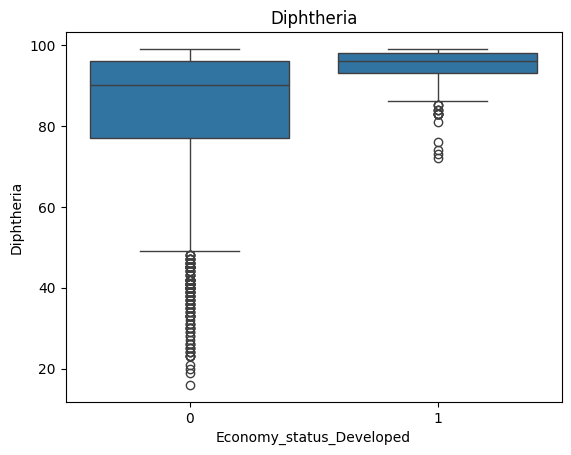

In [48]:
plt.title("Diphtheria")
sns.boxplot(data=df,x='Economy_status_Developed',y='Diphtheria')

<Axes: title={'center': 'Hepatitis_B'}, xlabel='Economy_status_Developed', ylabel='Hepatitis_B'>

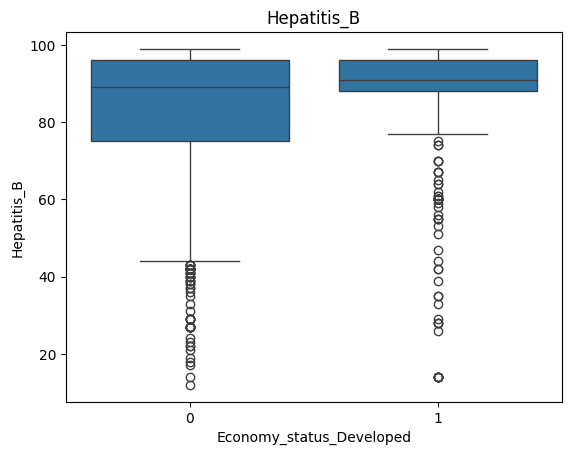

In [49]:
plt.title("Hepatitis_B")
sns.boxplot(data=df,x='Economy_status_Developed',y='Hepatitis_B')